<a href="https://colab.research.google.com/github/MateusSanfer/Challenge-Telecom-X-One/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [58]:
df = pd.read_json('/content/TelecomX_Data.json')
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

### **Verificando Inconsistências nos Dados**

In [59]:
def processador_dados(json_path):
  df =pd.read_json(json_path)
  campos = ['customer', 'phone', 'internet', 'account']
  dfs_expand = [pd.json_normalize(df[col]) for col in campos]
  return pd.concat([df[['customerID', 'Churn']]] + dfs_expand, axis=1)

dados_limpos = processador_dados('/content/TelecomX_Data.json')

In [60]:
dados_limpos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Alterando os nomes das categorias para usar letras minúsculas e underscores (_).

In [61]:
dados_limpos.rename(columns={'Charges.Monthly': 'monthly_charges',
                             'Charges.Total': 'total_charges'}, inplace=True)

In [62]:
dados_limpos.columns = (
    dados_limpos.columns
    .str.strip()
    .str.replace('([a-z0-9])([A-Z])', r'\1_\2', regex=True)
    .str.replace(' ', '_')
    .str.lower()
)

In [63]:
dados_limpos.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [64]:
dados_limpos['total_charges'] = dados_limpos['total_charges'].replace(' ', np.nan)
dados_limpos['total_charges'] = dados_limpos['total_charges'].astype(float)

In [65]:
dados_limpos['total_charges'] = dados_limpos['total_charges'].astype(np.float64)

In [66]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

### **Duplicatas**

Verificando se tem algum dados duplicado.

In [67]:
dados_limpos['customer_id'].duplicated().sum()

np.int64(0)

### **Tipos de dados inconsistentes**

In [68]:
dados_limpos.dtypes

,0
customer_id,object
churn,object
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object


### **Valores ausentes `(NaN)`**

In [69]:
dados_limpos.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


Verificar quais registros estão com TotalCharges nulo

In [70]:
dados_limpos.query('monthly_charges == 0 | total_charges == 0')

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges


In [71]:
dados_limpos[dados_limpos['total_charges'].isnull()]

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Como o campo `ternure` está em 0 quer dizer que o cliente acabou de entrar, faz sentido o campo está vazio, por isso como não há um valor informativo útil de `TotalCharges`, e preencher com 0 poderia criar um dado falso. resolvi remover os 11 registros com dados ausentes no `TotalCharges`.

In [72]:
dados_limpos = dados_limpos.dropna(subset=['total_charges'])

In [73]:
dados_limpos.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


### **Erros de formatação em categorias**

In [74]:
for col in dados_limpos.select_dtypes(include='object').columns:
    print(f"{col}: {dados_limpos[col].unique()}")


customer_id: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes' 'No phone service']
internet_service: ['DSL' 'Fiber optic' 'No']
online_security: ['No' 'Yes' 'No internet service']
online_backup: ['Yes' 'No' 'No internet service']
device_protection: ['No' 'Yes' 'No internet service']
tech_support: ['Yes' 'No' 'No internet service']
streaming_tv: ['Yes' 'No' 'No internet service']
streaming_movies: ['No' 'Yes' 'No internet service']
contract: ['One year' 'Month-to-month' 'Two year']
paperless_billing: ['Yes' 'No']
payment_method: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


Removendo valores vazios que não podem ser usados para modelagem ou análise. Eles não são informativos e indicam registros incompletos.

In [75]:
dados_limpos[dados_limpos['churn'] == '']

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


Remover registros com `Churn == ''`.

In [76]:
dados_limpos = dados_limpos[dados_limpos['churn'] != '']

In [77]:
dados_limpos[dados_limpos['churn'] == '']

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges


### **Inconsistências nas categorias**

In [135]:
dados_limpos['senior_citizen'].value_counts()

,count
senior_citizen,
0,5890
1,1142


Criando a coluna `contas_diarias`. Que calcular o gasto médio por dia com base no valor mensal.



In [136]:
dados_limpos['contas_diarias'] = dados_limpos['monthly_charges'] /30

In [137]:
dados_limpos[['monthly_charges', 'contas_diarias']].head(10)

,monthly_charges,contas_diarias
0,65.60,2.186667
1,59.90,1.996667
2,73.90,2.463333
3,98.00,3.266667
4,83.90,2.796667
5,69.40,2.313333
6,109.70,3.656667
7,84.65,2.821667
8,48.20,1.606667
9,90.45,3.015000


In [81]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   object 
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   object 
 5   dependents         7032 non-null   object 
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   object 
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 non-n

### **Padronização e Transformação de Dados**

In [82]:
cols_sim_nao = ['churn', 'partner', 'dependents', 'phone_service', 'paperless_billing']

dados_limpos[cols_sim_nao] = dados_limpos[cols_sim_nao].replace({'Yes': 1, 'No': 0})

<ipython-input-82-ab56b64746d2>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Substitui "No internet service" e "No phone service" por "No".

In [83]:
no_service_cols = [
    'multiple_lines', 'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]

dados_limpos[no_service_cols] = dados_limpos[no_service_cols].replace({
    'No internet service': 'No', 'No phone service': 'No'
})

In [84]:
dados_limpos.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [85]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 non-n

#📊 Carga e análise

### **Análise Descritiva**

**Estatísticas descritivas para os dados numéricos:**

In [86]:
dados_limpos.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


📌 1. **Proporção de Evasão (Churn)**

Média (churn): 0.265 → Cerca de 26,6% dos clientes cancelaram o serviço.

> 💡 *Essa taxa é relativamente alta, indicando um problema significativo de retenção.*


📌 2. **Tempo como Cliente (tenure)**

Média: 32,42 meses

Mediana: 29 meses

Máximo: 72 meses

Mínimo: 1 mês

> *💡 Boa parte dos clientes permanece por mais de 2 anos, mas também há muitos com permanência muito curta, o que pode sugerir rotatividade precoce em certos perfis.*

📌 3. **Gastos Mensais e Totais**
```
Variável	Média	Mediana	Mínimo	Máximo
monthly_charges	R$ 64,80	R$ 70,35	R$ 18,25	R$ 118,75
total_charges	R$ 2.283,30	R$ 1.397,48	R$ 18,80	R$ 8.684,80
contas_diarias	R$ 2,16	R$ 2,35	R$ 0,61	R$ 3,96
```
> *💡 Clientes com mensalidades mais altas tendem a ter maior risco de evasão. Essa hipótese pode ser testada nas próximas análises.*

📌 4. **Perfil Demográfico e de Serviço**

Idosos (senior_citizen): Apenas 16% dos clientes têm 65 anos ou mais.

Com parceiro(a): ~48%

Com dependentes: ~30%

Com serviço telefônico: ~90%

Fatura digital (paperless_billing): ~59%

>*💡 A maioria dos clientes não é idosa, não tem dependentes e utiliza cobrança digital. Esses fatores podem ter relação com o churn dependendo da combinação com outras variáveis (como tipo de contrato ou método de pagamento).*

 Análise da coluna `tenure` (tempo como cliente)

 Avalia o tempo médio e mediano que os clientes permanecem na empresa. Essa métrica é útil para entender a fidelidade média dos clientes e se há tendência de evasão em ciclos curtos.

In [87]:
print(f"Tempo médio como cliente: {dados_limpos['tenure'].mean():.2f}")
print(f"Mediana do tempo:  {dados_limpos['tenure'].median():.2f}")


Tempo médio como cliente: 32.42
Mediana do tempo:  29.00


Investigar o valor financeiro investido pelos clientes mensalmente e ao longo de sua jornada. Faturas muito altas podem indicar risco de evasão, enquanto valores baixos podem sugerir menor engajamento.

In [88]:
print(f"Fatura mensal média: {dados_limpos['monthly_charges'].mean():.2f}")
print(f"Gasto total médio: {dados_limpos['total_charges'].mean():.2f}")


Fatura mensal média: 64.80
Gasto total médio: 2283.30


Identifica a proporção de clientes que permaneceram vs. cancelaram o serviço. Essa métrica é crucial para entender o problema: quanto maior a taxa de evasão, maior a necessidade de estratégias de retenção.

Distribuição do churn

In [89]:
dados_limpos['churn'].value_counts(normalize=True) * 100

,proportion
churn,
0,73.421502
1,26.578498


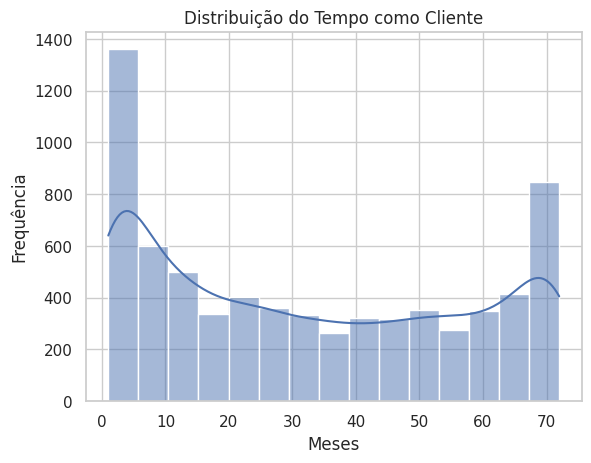

In [90]:
sns.histplot(dados_limpos['tenure'], kde=True)
plt.title("Distribuição do Tempo como Cliente")
plt.xlabel("Meses")
plt.ylabel("Frequência")
plt.show()


### **Distribuição da Evasão**

📊 **Visualização da Evasão de Clientes (Churn)**

A seguir, apresentamos dois gráficos que ilustram a distribuição da variável `churn`, responsável por indicar se o cliente deixou ou permaneceu na empresa:

Gráfico de Barras: mostra a contagem absoluta de clientes que saíram (1) e que permaneceram (0).

Gráfico de Pizza: mostra a proporção percentual entre os dois grupos.

Distribuição Absoluta	Distribuição Percentual

> *📌 Os gráficos acima revelam que cerca de 26,6% dos clientes saíram da empresa, enquanto 73,4% permaneceram.*

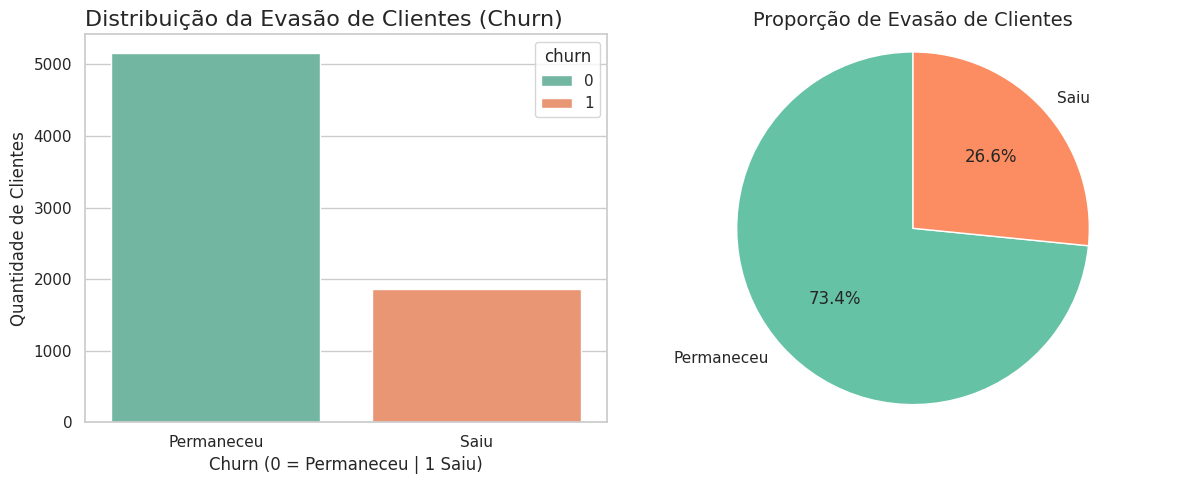

In [91]:
churn_counts = dados_limpos['churn'].value_counts()
labels = ['Permaneceu', 'Saiu']
colors = ['#66c2a5', '#fc8d62']

sns.set(style='whitegrid')

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='churn', data=dados_limpos, hue='churn', palette='Set2', ax=axes[0])
axes[0].set_title('Distribuição da Evasão de Clientes (Churn)', loc='left', fontsize=16)
axes[0].set_xlabel('Churn (0 = Permaneceu | 1 Saiu)', fontsize=12)
axes[0].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(labels)


axes[1].pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Proporção de Evasão de Clientes', fontsize=14)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

## **Contagem de Evasão por Variáveis Categóricas**

Essa etapa busca identificar padrões na evasão de clientes ao analisar variáveis categóricas, como gênero, tipo de contrato e método de pagamento. A ideia é compreender se certos perfis têm maior probabilidade de cancelar o serviço, permitindo direcionar estratégias mais eficazes para retenção.

Dicionário para deixar os rótulos mais legíveis.

In [96]:

nomes_legiveis = {
    'gender': 'Gênero',
    'contract': 'Tipo de Contrato',
    'payment_method': 'Forma de Pagamento',
    'internet_service': 'Serviço de Internet',
    'streaming_tv': 'Streaming de TV',
    'multiple_lines': 'Linhas Telefônicas',
    'churn': 'Evasão',
}


Função responsável por gerar gráficos que mostram a distribuição absoluta de clientes que cancelaram o serviço.

In [151]:
def plot_churn_plotly(col):
    # Substitui os valores binários para legenda
    dados_plot = dados_limpos.copy()
    dados_plot['churn'] = dados_plot['churn'].replace({0: 'Permaneceu', 1: 'Saiu'})

    fig = px.histogram(
        dados_plot,
        x=col,
        color='churn',
        barmode='group',
        text_auto=True,
        color_discrete_map={'Permaneceu': '#66c2a5', 'Saiu': '#fc8d62'},
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Status do Cliente'
        }
    )

    fig.update_layout(

        title=f'Evasão por {nomes_legiveis.get(col, col).title()}',
        xaxis_title=nomes_legiveis.get(col, col).title(),
        yaxis_title='Quantidade de Clientes',
        legend_title='Status',
        bargap=0.2
    )

    fig.show()

Visualização da proporção de clientes que cancelaram o serviço, permitindo uma análise clara da taxa de churn e possíveis tendências.

In [156]:
def plot_churn_percent_plotly(col):
    # Cópia dos dados
    df = dados_limpos.copy()

    # Agrupar e calcular a proporção de churn = 1
    proporcao = (
        df.groupby(col)['churn']
        .mean()
        .reset_index()
        .sort_values('churn', ascending=True)
    )
    proporcao['churn'] *= 100  # converter para %

    # Gráfico com Plotly horizontal
    fig = px.bar(
        proporcao,
        x='churn',
        y=col,
        orientation='h',
        text='churn',
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Evasão (%)'
        },
        color='churn',
        color_continuous_scale='Reds'
    )

    fig.update_layout(

        title=f'Proporção de Evasão por {nomes_legiveis.get(col, col).title()}',
        xaxis_title='Evasão (%)',
        yaxis_title=nomes_legiveis.get(col, col).title(),
        coloraxis_showscale=False
    )

    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.show()


**Evasão por Tipo de Contrato.**
Como pode ser observado o Tipo de Contrato mês a mês (Month-to-Month) tem a maior insidência de cancelamentos.

In [152]:
plot_churn_plotly('contract')

Observa-se que clientes com contratos mês a mês apresentam a maior taxa de churn, destacando a vulnerabilidade desse grupo em comparação com outras formas de contratação.

In [157]:
plot_churn_percent_plotly('contract')

**Evasão por Forma de pagamento**: O Cheque eletrônico está com maior indice de evasão. Com 45% das evasões dos clientes.

In [139]:
plot_churn_plotly('payment_method')
plot_churn_percent_plotly('payment_method')

**Evasão por Serviço de Internet:** A fibra optica consiste com a maior taxa de evasão.

In [148]:
plot_churn_plotly('internet_service')
plot_churn_percent_plotly('internet_service')

### **Evasão por Gênero:** As mulheres apresentam um número um pouco maior de evasão em relação aos homens.

In [158]:
df = dados_limpos.copy()

genero_churn = (
        df.groupby('gender')['churn']
        .mean()
        .reset_index()
        .sort_values('churn', ascending=False)
    )
genero_churn['churn'] *= 100

fig = px.bar(
        genero_churn,
        x='gender',
        y='churn',
        text='churn',
        labels={'gender': 'Gênero', 'churn': 'Evasão (%)'},
        color='churn',
        color_continuous_scale='Reds'
    )

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
        title='Proporção de Evasão por Gênero',
        yaxis_title='Evasão (%)',
        xaxis_title='Gênero',
        coloraxis_showscale=False
    )

fig.show()

## **Contagem de Evasão por Variáveis Numéricas**

Nesta seção, comparamos a distribuição de quatro variáveis numéricas — `tenure`, `monthly_charges`, `total_charges` e `contas_diarias` — entre clientes que permaneceram e os que cancelaram seus serviços (`churn`).

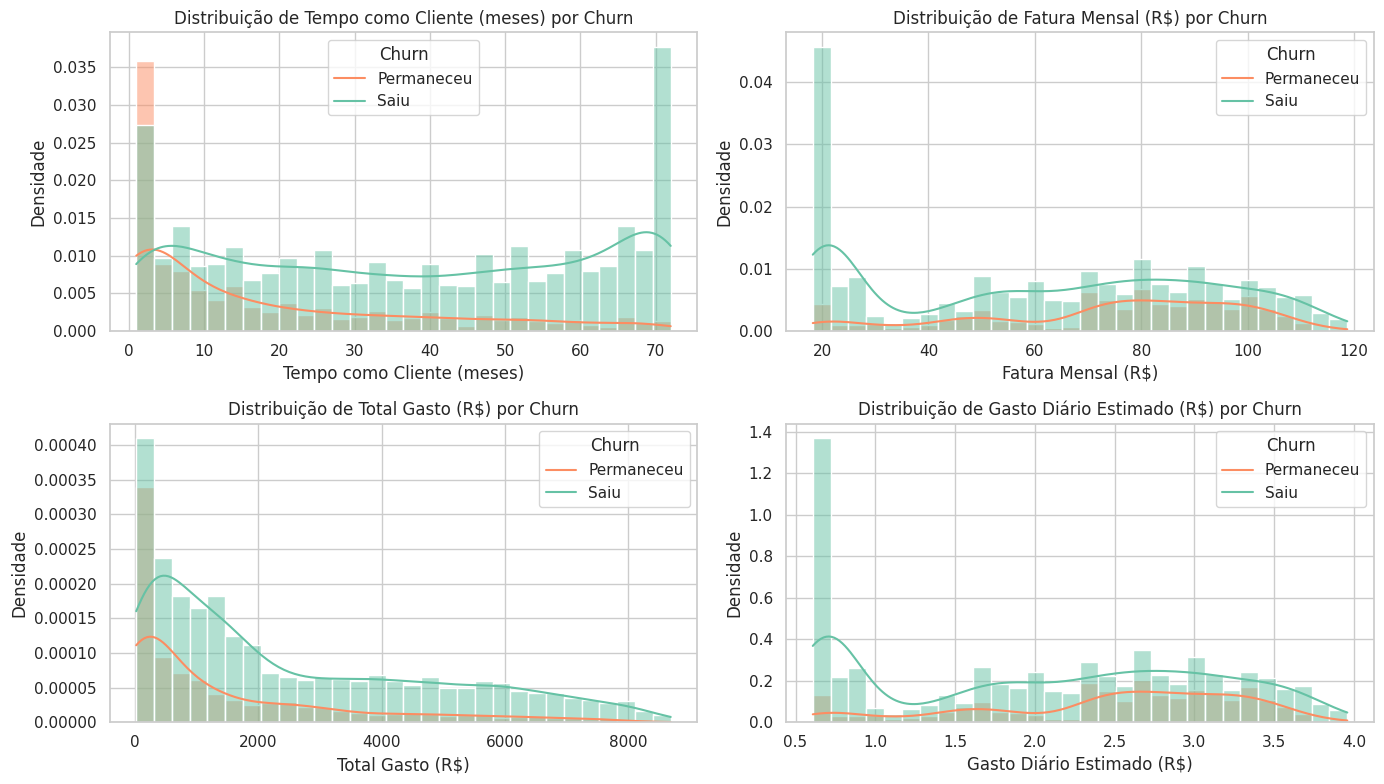

In [161]:
variaveis = ['tenure', 'monthly_charges', 'total_charges', 'contas_diarias']
titulos = {
    'tenure': 'Tempo como Cliente (meses)',
    'monthly_charges': 'Fatura Mensal (R$)',
    'total_charges': 'Total Gasto (R$)',
    'contas_diarias': 'Gasto Diário Estimado (R$)'
}

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()  # facilita iteração

# Gerar os 4 gráficos
for i, col in enumerate(variaveis):
    sns.histplot(
        data=dados_limpos,
        x=col,
        hue='churn',
        kde=True,
        palette='Set2',
        bins=30,
        stat='density',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribuição de {titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel(titulos[col])
    axes[i].set_ylabel('Densidade')
    axes[i].legend(title='Churn', labels=['Permaneceu', 'Saiu'])

plt.tight_layout()
plt.show()


Essa análise nos ajuda a entender como o comportamento financeiro e o tempo de permanência impactam a evasão.

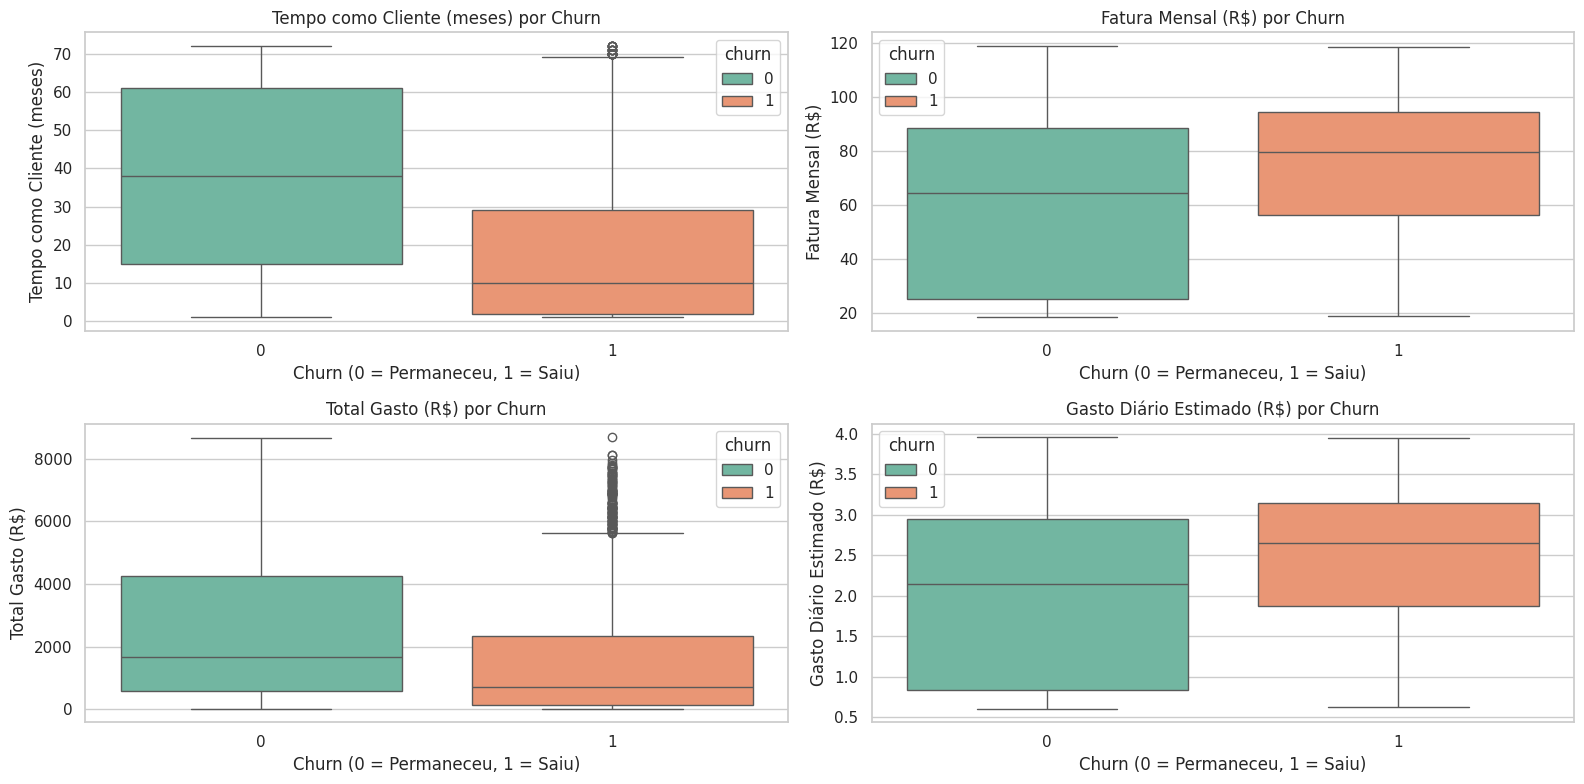

In [164]:
variaveis = ['tenure', 'monthly_charges', 'total_charges', 'contas_diarias']
titulos = {
    'tenure': 'Tempo como Cliente (meses)',
    'monthly_charges': 'Fatura Mensal (R$)',
    'total_charges': 'Total Gasto (R$)',
    'contas_diarias': 'Gasto Diário Estimado (R$)'
}

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

# Geração dos boxplots
for i, col in enumerate(variaveis):
    sns.boxplot(
        data=dados_limpos,
        x='churn',
        y=col,
        hue='churn',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'{titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
    axes[i].set_ylabel(titulos[col])

plt.tight_layout()
plt.show()

#📄Relatorio Final

# Análise de Evasão de Clientes (Churn) | Telecom X

## 🧾 Introdução

A Telecom X enfrenta um **alto índice de cancelamentos de clientes**. Para melhorar a retenção, é necessário compreender os fatores que influenciam esse comportamento de evasão, conhecido como **churn**.

Este projeto teve como objetivo analisar os dados de clientes da empresa para **identificar padrões e possíveis causas de cancelamento**, com foco em variáveis demográficas, contratuais e de consumo.

## 🧹 Limpeza e Tratamento de Dados

Foram seguidos os seguintes passos para preparar os dados:

* 📥 **Importação de dados JSON** via API simulada.
* 🔍 **Normalização de colunas aninhadas** (`customer`, `phone`, `internet`, `account`).
* ❌ **Remoção de registros com valores ausentes**, especialmente em `TotalCharges` e `Churn`.
* ✅ **Conversão de variáveis binárias** de `"Yes"/"No"` para `1/0`.
* 🌐 **Padronização de nomes de colunas** para o formato `snake_case` (ex: `total_charges`).
* ➕ **Criação da variável derivada `contas_diarias`**, com base no gasto mensal.

## 🔎 Análise Exploratória de Dados (EDA)

A seguir, apresentamos os principais resultados exploratórios, divididos em categorias:

### 🎯 Distribuição Geral do Churn

* **Cerca de 26,6% dos clientes cancelaram** seus serviços.
* Gráficos de **barras** e **pizza** evidenciam o problema de retenção.

### 📋 Churn por Variáveis Categóricas

Foi analisada a evasão por variáveis como `tipo de contrato`, `forma de pagamento`, `internet_service`, entre outras.

Principais achados:

* Clientes com **contrato mensal** têm **alta taxa de churn**.
* Formas de pagamento como **"Electronic Check"** estão mais associadas à evasão.
* Clientes que **não possuem serviços extras** (como `tech_support`, `online_security`) tendem a sair com mais frequência.

*As análises incluíram gráficos interativos com Plotly e proporções (%) por grupo.*



### 📈 Churn por Variáveis Numéricas

Foram analisadas variáveis como:

* `tenure` → tempo como cliente
* `monthly_charges` → gasto mensal
* `total_charges` → gasto total acumulado
* `contas_diarias` → gasto diário estimado

Padrões observados:

* **Clientes com pouco tempo de casa (`tenure` baixo)** tendem a cancelar mais.
* **Churn mais comum entre clientes com faturas mensais altas.**
* **Clientes com `total_charges` baixo** (recém-chegados) apresentam churn elevado.

Gráficos de **histogramas** e **boxplots** foram utilizados para visualizar esses padrões.


## 💡 Conclusões e Insights

* A análise do churn revela padrões importantes sobre os clientes que cancelam seus serviços. Observamos que a evasão é predominantemente registrada entre usuários que possuem pouco tempo de permanência na empresa, indicando uma tendência de desistência precoce.

* Além disso, clientes com contratos mensais apresentam os maiores índices de churn, sugerindo uma maior vulnerabilidade desse modelo de assinatura. A cobrança via electronic check também se destaca como um fator associado ao cancelamento, possivelmente devido à praticidade limitada desse método de pagamento.

* Clientes que pagam mais por mês e não utilizam serviços adicionais estão mais propensos a cancelar, reforçando a importância de agregar valor à experiência do cliente.


## ✅ Recomendações

Com base nesses insights, recomenda-se que a Telecom X adote estratégias para minimizar a evasão e fortalecer a retenção de clientes:
1. **Incentivar contratos de longo prazo:** Criar programas de fidelidade, oferecer descontos progressivos ou benefícios exclusivos para clientes que optam por assinaturas anuais.
2. **Ampliar o valor dos serviços adicionais:** Estimular a adesão a pacotes como suporte técnico premium, segurança online ou benefícios exclusivos para quem utiliza mais serviços da empresa.
3. **Revisar métodos de pagamento:** Reduzir a dependência do electronic check, promovendo opções mais convenientes como débito automático, cartão de crédito ou PIX, para facilitar transações e reduzir cancelamentos.
4. **Aprimorar o suporte nos primeiros meses:** Implementar uma jornada de boas-vindas personalizada, com contato proativo, ofertas especiais e suporte dedicado para os novos clientes.



